In [1]:
import numpy as np
import pandas as pd

In [2]:
pwd

'C:\\Users\\User\\Desktop\\ML urfu 2022'

In [3]:
melb_data = pd.read_csv('C:\\Users\\User\\Desktop\\ML urfu 2022\\melb_data_ps.csv', sep=',')
melb_data.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,"-37.8072, 144.9941"


СОЗДАНИЕ КОПИИ ТАБЛИЦЫ

На протяжении всего модуля мы будем производить множество тренировочных преобразований с нашей таблицей. Поэтому, чтобы не переопределять переменную melb_data и тем самым не повредить первоначальный DataFrame, создадим копию melb_df с помощью метода copy():

In [4]:
melb_df = melb_data.copy()
melb_df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,"-37.8072, 144.9941"


На протяжении всего модуля наши данные будут множество раз меняться (будут добавляться и удаляться столбцы), поэтому, чтобы у вас не было расхождений с ответами в заданиях и в уроке, советуем следить за изменениями на протяжении модуля и фиксировать их у себя в ноутбуке.

⭐ Лайфхак. Старайтесь всегда оставлять переменную с первоначальным DataFrame неизменной, создавайте копию исходной таблицы и совершайте преобразования на ней. Это оградит вас от ошибок, которые можно совершить при подготовке данных. Например, если вы понимаете, что преобразование оказалось неудачным, достаточно будет лишь запустить ячейку, в которой вы производите копирование, а не читать таблицу заново. Особенно критичным это может быть, когда количество строк в таблице исчисляется миллионами и её чтение занимает до нескольких минут.

Среди списка базовых операций над столбцами в Pandas важное место занимает возможность удаления столбцов из таблицы. Это может быть полезно, например, когда в данных есть признаки, которые не несут полезной информации.

Представим, что мы хотим построить модель, которая бы предсказывала цену объекта недвижимости в Мельбурне. Даже не будучи профессиональными риелторами, мы можем легко сделать следующие выводы:

цена объекта никак не зависит от его порядкового номера (столбец index);
признак, описывающий долготу и широту в виде кортежа Coordinates, дублирует информацию, представленную в столбцах Longitude и Lattitude.

За удаление строк и столбцов в таблице отвечает метод drop().

Удалим столбцы index и Coordinates из таблицы с помощью метода drop(). Выведем первые пять строк таблицы и убедимся, что всё прошло успешно.

In [5]:
melb_df = melb_df.drop(['index', 'Coordinates'], axis=1)
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


melb_df.drop(['index','Coordinates'],axis=1,inplace=True)
melb_df.head()

Например, давайте создадим переменную total_rooms, в которой будем хранить общее количество комнат в здании. Для этого выполним сложение столбцов с количеством комнат, ванн и спален:

In [6]:
total_rooms = melb_df['Rooms'] + melb_df['Bedroom'] + melb_df['Bathroom']
display(total_rooms)

0         5
1         5
2         8
3         8
4         8
         ..
13575    10
13576     8
13577     8
13578     9
13579     9
Length: 13580, dtype: int64

А теперь введём признак MeanRoomsSquare, который соответствует средней площади одной комнаты для каждого объекта. Для этого разделим площадь здания на полученное ранее общее количество комнат:

In [7]:
melb_df['MeanRoomsSquare'] = melb_df['BuildingArea'] / total_rooms
display(melb_df['MeanRoomsSquare'])

0        25.200000
1        15.800000
2        18.750000
3        15.750000
4        17.750000
           ...    
13575    12.600000
13576    16.625000
13577    15.750000
13578    17.444444
13579    12.444444
Name: MeanRoomsSquare, Length: 13580, dtype: float64

Можно ввести ещё один интересный признак — AreaRatio, коэффициент соотношения площади здания (BuildingArea) и площади участка (Landsize). Для этого разницу двух площадей поделим на их сумму:

In [8]:
diff_area = melb_df['BuildingArea'] - melb_df['Landsize']
sum_area = melb_df['BuildingArea'] + melb_df['Landsize']
melb_df['AreaRatio'] = diff_area/sum_area
display(melb_df['AreaRatio'])

0       -0.231707
1       -0.327660
2        0.056338
3        0.145455
4        0.083969
           ...   
13575   -0.676093
13576   -0.429185
13577   -0.551601
13578   -0.693060
13579   -0.527426
Name: AreaRatio, Length: 13580, dtype: float64

Что показывает такой коэффициент? Если присмотреться, можно увидеть, что AreaRatio лежит в интервале от -1 до 1

Рассмотрим три случая, чтобы понять его значение:

Если рассматриваемые площади равны, то числитель дроби зануляется и коэффициент тоже равен 0.
Если одна из площадей начинает доминировать над другой, то коэффициент начинает расти в отрицательную сторону, если площадь участка больше площади здания, и в положительную сторону, если наоборот.


Наконец, в предельном случае, если площадь здания равна 0, то числитель дроби равен знаменателю со знаком минус, а коэффициент равен -1, а если площадь участка равна 0, то числитель дроби равен знаменателю со знаком плюс, а коэффициент равен 1.
Таким образом, значение в столбце AreaRatio служит своеобразным указателем соотношения площадей объекта недвижимости. Для пустырей — участков без строений — он будет равен -1, для домов без территории — 1, во всех остальных случаях мы можем увидеть, какая площадь больше — здания или участка.

Среди приведённых ниже вариантов кода выберите тот, который найдёт квадрат цены объекта недвижимости за наименьшее время и не выдаст ошибку.
Результат должен быть занесён в переменную price_square и представлять собой объект Series:

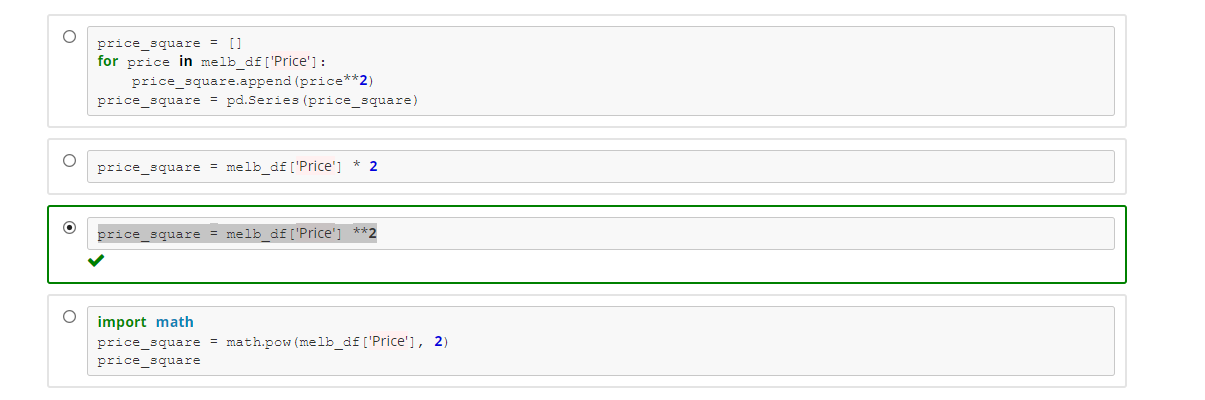

In [9]:
price_square = melb_df['Price'] **2

In [10]:
price_square

0        2.190400e+12
1        1.071225e+12
2        2.146225e+12
3        7.225000e+11
4        2.560000e+12
             ...     
13575    1.550025e+12
13576    1.062961e+12
13577    1.368900e+12
13578    6.250000e+12
13579    1.651225e+12
Name: Price, Length: 13580, dtype: float64

Задан DataFrame customer_df, содержащий столбцы:
cust_id — идентификатор клиента;
cust_age — возраст клиента (точкой отсчёта возраста считается 2021 год);
cust_sale — персональная скидка клиента;
cust_year_birth — год рождения клиента;
cust_order — сумма заказа клиента.

In [11]:
customer_df = pd.DataFrame({
        'number': [0, 1, 2, 3, 4],
        'cust_id': [128, 1201, 9832, 4392, 7472],
        'cust_age': [13, 21, 19, 21, 60],
        'cust_sale': [0, 0, 0.2, 0.15, 0.3],
        'cust_year_birth': [2008, 2000, 2002, 2000, 1961],
        'cust_order': [1400, 14142, 900, 1240, 8430]
    })

In [12]:
customer_df

,number,cust_id,cust_age,cust_sale,cust_year_birth,cust_order
0,0,128,13,0.00,2008,1400
1,1,1201,21,0.00,2000,14142
2,2,9832,19,0.20,2002,900
3,3,4392,21,0.15,2000,1240
4,4,7472,60,0.30,1961,8430


Какие столбцы не несут полезной информации/дублируют информацию из других столбцов и поэтому могут быть удалены?

В качестве ответа запишите названия этих столбцов по порядку их следования в коде, через запятую, без пробелов и кавычек

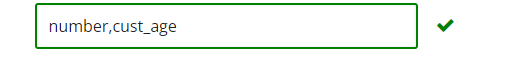

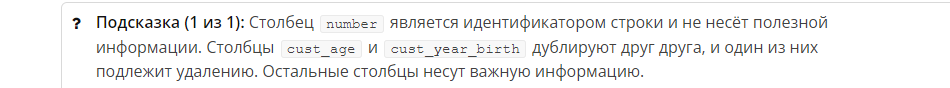

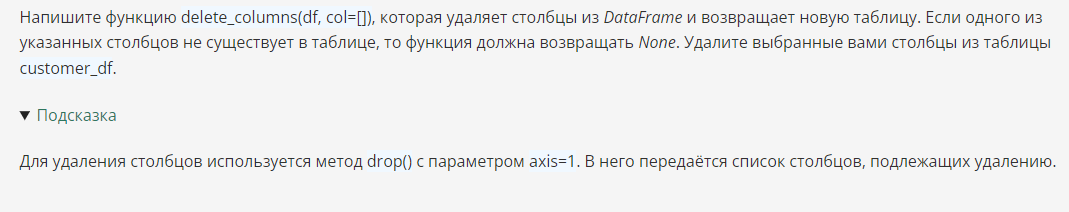

Напишите функцию delete_columns(df, col=[]), которая удаляет столбцы из DataFrame и возвращает новую таблицу. Если одного из указанных столбцов не существует в таблице, то функция должна возвращать None. Удалите выбранные вами столбцы из таблицы customer_df.

Подсказка
Для удаления столбцов используется метод drop() с параметром axis=1. В него передаётся список столбцов, подлежащих удалению.

In [13]:
def delete_columns(df, col=[]):
    """
    Напишите функцию delete_columns(df, col=[]), которая удаляет столбцы из DataFrame и возвращает новую таблицу. 
    Если одного из указанных столбцов в таблице не существует, то функция должна возвращать None.
    """
    for item in col:
        if item not in df.columns:
            return None
        else:
            df.drop(item, axis=1,inplace=True)
    return df


if __name__ =='__main__':
    customer_df = pd.DataFrame({
        'number': [0, 1, 2, 3, 4],
        'cust_id': [128, 1201, 9832, 4392, 7472],
        'cust_age': [13, 21, 19, 21, 60],
        'cust_sale': [0, 0, 0.2, 0.15, 0.3],
        'cust_year_birth': [2008, 2000, 2002, 2000, 1961],
        'cust_order': [1400, 14142, 900, 1240, 8430]
    })
    columns_for_delete= ['number','cust_age','cust_year_birth'] #выбранные вами столбцы
    new_df = delete_columns(customer_df, columns_for_delete)
    print(new_df)


   cust_id  cust_sale  cust_order
0      128       0.00        1400
1     1201       0.00       14142
2     9832       0.20         900
3     4392       0.15        1240
4     7472       0.30        8430


адан DataFrame countries_df, содержащий следующие столбцы: название страны, население (population) в миллионах человек и площадь страны (square) в квадратных километрах.

In [14]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})
countries_df

,country,population,square
0,Англия,56.29,133396
1,Канада,38.05,9984670
2,США,322.28,9826630
3,Россия,146.24,17125191
4,Украина,45.50,603628
5,Беларусь,9.50,207600
6,Казахстан,17.04,2724902


Для каждой страны рассчитайте плотность населения (количество человек на квадратный километр).

Затем по полученным данным рассчитайте среднее по плотностям населения в указанных странах. Ответ округлите до сотых.

Плотность населения рассчитывается как количество человек, проживающих на территории отдельной страны, делённое на площадь этой страны. Обратите внимание, что население в таблице представлено в миллионах.

Чтобы рассчитать плотность населения, необходимо столбец с населением (population) умножить на миллион, чтобы получить общее количество людей, и разделить на столбец с площадью (square). На полученной Series нужно вычислить среднее значение и округлить его до второго знака после запятой.

In [15]:
countries_df["new_population"]=countries_df["population"]*1000000
countries_df["population_1km"]=countries_df["new_population"]/countries_df["square"]
countries_df

,country,population,square,new_population,population_1km
0,Англия,56.29,133396,56290000.0,421.976671
1,Канада,38.05,9984670,38050000.0,3.810842
2,США,322.28,9826630,322280000.0,32.796595
3,Россия,146.24,17125191,146240000.0,8.539467
4,Украина,45.50,603628,45500000.0,75.377550
5,Беларусь,9.50,207600,9500000.0,45.761079
6,Казахстан,17.04,2724902,17040000.0,6.253436


In [16]:
countries_df.population_1km.mean()

84.93080566562001

In [17]:
##ПРИЗНАКИ ДАТЫ И ВРЕМЕНИ

При генерации новых признаков очень ценным может стать временной признак (признак даты и времени). Это особый тип данных, с которым приходится сталкиваться в большинстве задач по обработке данных. В реальных задачах часто нужно сравнивать даты, выделять день недели или час, вычислять различные интервалы между датами. 

Например, в наших данных об объектах недвижимости есть признак даты продажи — столбец Date. Из данного признака можно выделить массу полезной информации, например год, месяц или день недели продажи имущества. На рынке недвижимости, как известно, присутствует сезонность: есть периоды, когда недвижимость покупается чаще, а есть интервалы времени, когда рынок претерпевает застой, поэтому было бы неплохо учитывать эту сезонность при анализе рынка.

ФОРМАТ DATETIME

В жизни мы видим даты в привычных для нас форматах. Например, запись 01.12.18 обычно означает 1 декабря 2018 года. Однако для жителей США эта дата окажется 12 января 2018 года, так как для них привычнее сначала указывать номер месяца, а затем день. 

Многие выгрузки из систем и баз данных имеют свой служебный формат. Например, формат времени из разных систем может отличаться:

2018-11-09 15:45:21;
11/09/2018 3:45:20 PM;
2018-11-09T15:45:21.2984.

ля всех этих случаев необходимо задавать формат распознавания дат и уметь сравнивать их между собой. Для этого был создан единый способ обозначения даты и времени. 

Таким форматом в Pandas является формат datetime, который записывается как YYYY-MM-DD HH: MM: SS, то есть составляющие времени указываются в следующем порядке: год, месяц, день, час, минута, секунда.

В наших данных дата записана в виде DD/MM/YYYY, например 3/12/2017. Посмотрим на это:

In [18]:
display(melb_df['Date'])

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: Date, Length: 13580, dtype: object

Для того чтобы преобразовывать столбцы с датами, записанными в распространённых форматах, в формат datetime, можно воспользоваться функцией pandas.to_datetime(). В нашем случае в функции нужно указать параметр dayfirst=True, который будет обозначать, что в первоначальном признаке первым идет день. Преобразуем столбец Date в формат datetime, передав его в эту функцию:

In [19]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
display(melb_df['Date'])

0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

В результате мы переопределяем признак Date в формат datetime. При этом так как в изначальном варианте время не было указано, то и после преобразования оно опускается.

Стоит обратить внимание, что изменился тип данных для столбца Date, теперь его тип — datetime64. Рассмотрим несколько возможностей этого типа данных.

Тип данных datetime позволяет с помощью специального аксессора dt выделять составляющие времени из каждого элемента столбца, такие как

date — дата;
year, month, day — год, месяц, день;
time — время;
hour, minute, second — час, минута, секунда;
dayofweek — номер дня недели, от 0 до 6, где 0 — понедельник, 6 — воскресенье;
day_name — название дня недели;
dayofyear — порядковый день года;
quarter — квартал (интервал в три месяца)

Например, обратившись по атрибуту dt.year в столбце Date, мы можем «достать» год продажи и понять, за какой интервал времени (в годах) представлены наши данные, а также на какой год приходится наибольшее число продаж:

In [20]:
years_sold = melb_df['Date'].dt.year
print(years_sold)
print('Min year sold:', years_sold.min())
print('Max year sold:', years_sold.max())
print('Mode year sold:', years_sold.mode()[0])

0        2016
1        2016
2        2017
3        2017
4        2016
         ... 
13575    2017
13576    2017
13577    2017
13578    2017
13579    2017
Name: Date, Length: 13580, dtype: int64
Min year sold: 2016
Max year sold: 2017
Mode year sold: 2017


В результате обращения к атрибуту datetime melb_df['Date'].dt.year мы получаем объект Series, в котором в качестве значений выступают годы продажи объектов недвижимости. Мы можем занести результат в переменную year_sold и далее работать с ней как с обычным столбцом Series — вычислять максимум, минимум и модальное значение.

Из результатов видно, что данные представлены за интервал с 2016 по 2017 год и наибольшее количество объектов было продано в 2017 году.

In [21]:
type(years_sold)

pandas.core.series.Series

Примечание. Так как модальных значений в столбце может быть несколько, метод mode() возвращает объект Series, даже если мода в данных только одна. Чтобы сохранить стилистику вывода информации о годе продажи и выводить только число, а не Series, мы обращаемся к результату работы метода mode() по индексу 0.

In [22]:
years_sold.mode()

0    2017
Name: Date, dtype: int64

In [23]:
melb_df['MonthSale'] = melb_df['Date'].dt.month
melb_df['MonthSale'].value_counts(normalize=True)

5     0.149411
7     0.145950
9     0.135862
6     0.134757
8     0.114138
11    0.082032
4     0.069882
3     0.049926
12    0.044698
10    0.040574
2     0.032622
1     0.000147
Name: MonthSale, dtype: float64

Из результатов становится ясно, что наибольшее количество продаж недвижимости приходится на май, июль и сентябрь (пятый, седьмой и девятый месяцы соответственно). Месяцами застоя при этом являются месяцы — октябрь, февраль и январь (десятый, второй и первый месяцы соответственно).

РАБОТА С ИНТЕРВАЛАМИ

Часто бывает такая ситуация, что необходимо вычислять интервалы между двумя временными промежутками. Например, можно вычислить, сколько дней прошло с 1 января 2016 года до момента продажи объекта. Для этого можно просто найти разницу между датами продаж и заявленной датой, представленной в формате datetime:

In [24]:
delta_days = melb_df['Date'] - pd.to_datetime('2016-01-01') 
display(delta_days)

0       337 days
1        34 days
2       428 days
3       428 days
4       155 days
          ...   
13575   603 days
13576   603 days
13577   603 days
13578   603 days
13579   603 days
Name: Date, Length: 13580, dtype: timedelta64[ns]

В результате мы получаем Series, элементами которой является количество дней, которое прошло с 1 января 2016 года. Обратите внимание, что данные такого формата относятся к типу timedelta.

Чтобы превратить количество дней из формата интервала в формат целого числа дней, можно воспользоваться аксессором dt для формата timedelta и извлечь из него атрибут days:

In [25]:
display(delta_days.dt.days)

0        337
1         34
2        428
3        428
4        155
        ... 
13575    603
13576    603
13577    603
13578    603
13579    603
Name: Date, Length: 13580, dtype: int64

Рассмотрим другой пример. Давайте создадим признак возраста объекта недвижимости в годах на момент продажи. Для этого выделим из столбца с датой продажи год и вычтем из него год постройки здания. Результат оформим в виде столбца AgeBuilding:

In [26]:
melb_df['AgeBuilding'] = melb_df['Date'].dt.year - melb_df['YearBuilt']
display(melb_df['AgeBuilding'])

0         46
1        116
2        117
3         47
4          2
        ... 
13575     36
13576     22
13577     20
13578     97
13579     97
Name: AgeBuilding, Length: 13580, dtype: int64

На самом деле столбец AgeBuilding дублирует информацию столбца YearBuilt, так как, зная год постройки здания, мы автоматически знаем его возраст. Такие признаки не стоит оставлять вместе, поэтому оставим возраст здания, так как он является более наглядным, а год постройки удалим из таблицы:

In [27]:
melb_df['YearBuilt']

0        1970
1        1900
2        1900
3        1970
4        2014
         ... 
13575    1981
13576    1995
13577    1997
13578    1920
13579    1920
Name: YearBuilt, Length: 13580, dtype: int64

In [28]:
melb_df = melb_df.drop('YearBuilt', axis=1)

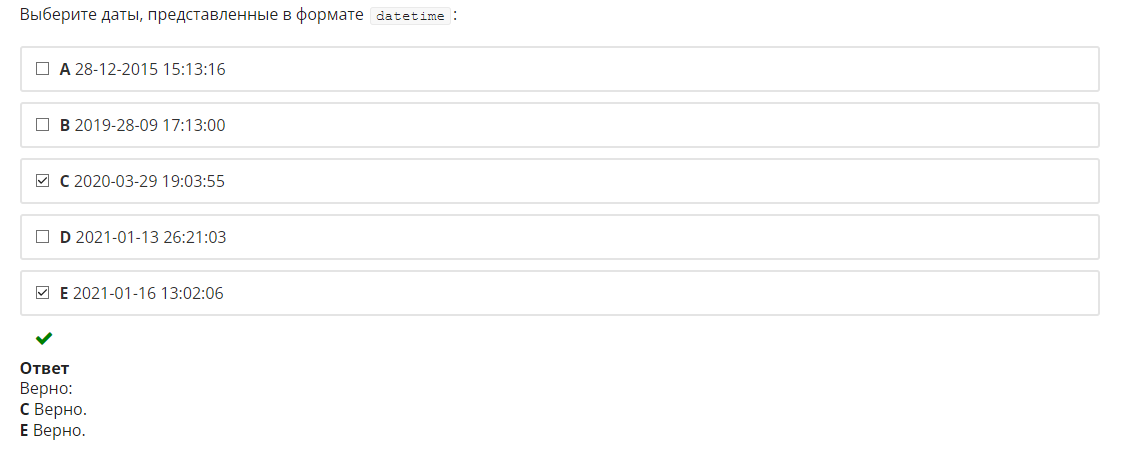

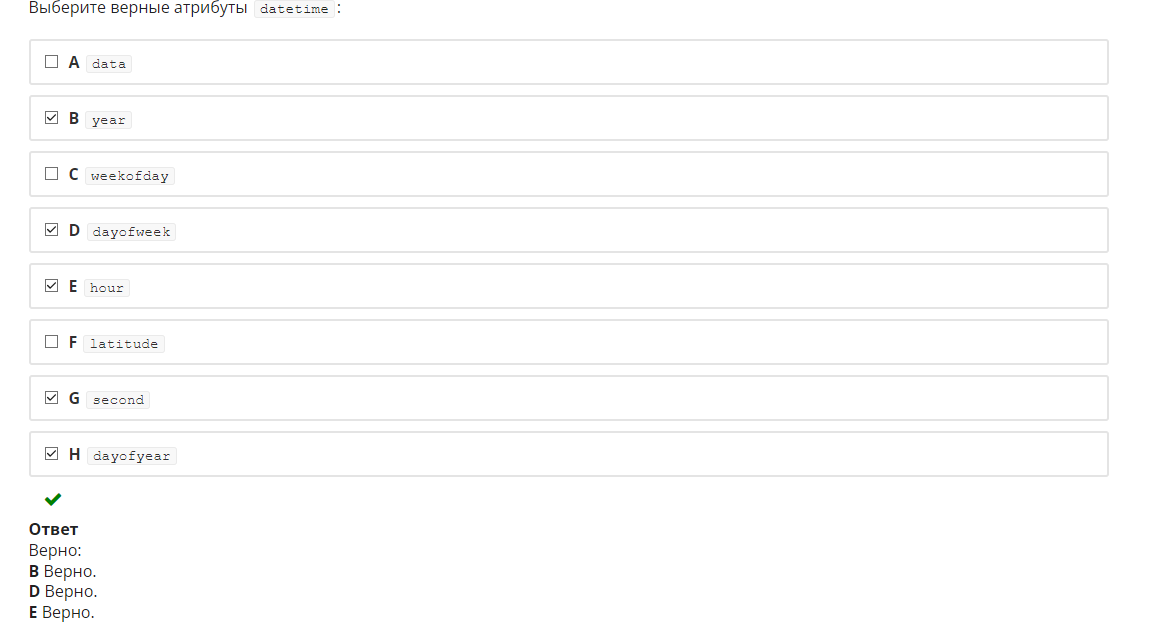

Создайте в таблице melb_df признак WeekdaySale (день недели). Найдите, сколько объектов недвижимости было продано в выходные (суббота и воскресенье), результат занесите в переменную weekend_count. В качестве ответа введите результат вывода переменной weekend_count.

In [29]:
melb_df.head(2)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,...,126.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,25.2,-0.231707,12,46
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,79.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,15.8,-0.327660,2,116


 Необходимо выделить атрибут datetime dayofweek из столбца melb_df["Date"] и занести результат в столбец WeekdaySale. После этого необходимо найти количество строк в DataFrame, у которых значение WeekdaySale равно либо 5 (суббота), либо 6 (воскресенье).

In [30]:
melb_df["Weekdaysale"]=melb_df['Date'].dt.dayofweek

In [31]:
melb_df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,Weekdaysale
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,25.2,-0.231707,12,46,5
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,15.8,-0.327660,2,116,3


In [32]:
melb_df[(melb_df["Weekdaysale"]==5) | (melb_df["Weekdaysale"]==6)].head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,Weekdaysale
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,...,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,25.20,-0.231707,12,46,5
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,18.75,0.056338,3,117,5


In [33]:
melb_df[(melb_df["Weekdaysale"]==5) | (melb_df["Weekdaysale"]==6)].shape[0]

12822

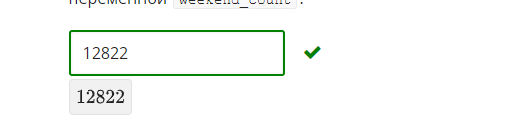

Вам представлены данные (в формате csv) об отчётах очевидцев НЛО в США за период с 1930 по 2020 год.

В данных есть следующие признаки:

"City" — город, где был замечен НЛО;
"Colors Reported" — цвет объекта;
"Shape Reported" — форма объекта;
"State" — обозначение штата;
"Time" — время, когда был замечен НЛО (данные отсортированы от старых наблюдений к новым). 
Прочитайте данные, сделайте преобразование времени к формату datetime и выполните задания ниже.

https://github.com/justmarkham/pandas-videos/tree/master/data

In [34]:
country=pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv")
country

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [35]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             18216 non-null  object
 1   Colors Reported  2882 non-null   object
 2   Shape Reported   15597 non-null  object
 3   State            18241 non-null  object
 4   Time             18241 non-null  object
dtypes: object(5)
memory usage: 712.7+ KB


In [36]:
country["Time"]=pd.to_datetime(country['Time'])

In [37]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             18216 non-null  object        
 1   Colors Reported  2882 non-null   object        
 2   Shape Reported   15597 non-null  object        
 3   State            18241 non-null  object        
 4   Time             18241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 712.7+ KB


В каком году отмечается наибольшее количество случаев наблюдения НЛО в США?

In [38]:
country["Time"].dt.year.value_counts()

1999    2774
2000    2635
1998    1743
1995    1344
1997    1237
        ... 
1936       2
1930       2
1935       1
1934       1
1933       1
Name: Time, Length: 68, dtype: int64

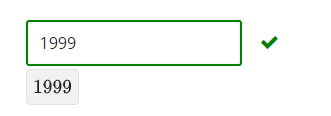

Найдите средний интервал времени (в днях) между двумя последовательными случаями наблюдения НЛО в штате Невада (NV).

Чтобы выделить дату из столбца Time, можно воспользоваться атрибутом datetime date.

Чтобы вычислить разницу между двумя соседними датами в столбце, примените к нему метод diff().

Чтобы перевести интервал времени в дни, воспользуйтесь атрибутом timedelta days.

In [39]:
country[country["State"]=="NV"]

,City,Colors Reported,Shape Reported,State,Time
76,Las Vegas,NaN,DISK,NV,1947-07-15 10:00:00
172,Nellis AFB,NaN,DISK,NV,1952-02-17 18:00:00
565,Fallon,NaN,OVAL,NV,1959-09-15 00:00:00
566,Goldfield,NaN,LIGHT,NV,1959-09-15 01:00:00
613,NaN,NaN,DISK,NV,1960-07-01 12:00:00
...,...,...,...,...,...
17447,Laughlin,NaN,FORMATION,NV,2000-09-16 22:00:00
17567,Las Vegas,NaN,SPHERE,NV,2000-09-30 22:25:00
17617,Las Vegas,RED YELLOW,OTHER,NV,2000-10-06 20:25:00
17890,Reno,NaN,TRIANGLE,NV,2000-11-07 02:15:00


In [40]:
country[country["State"]=="NV"]["Time"]

76      1947-07-15 10:00:00
172     1952-02-17 18:00:00
565     1959-09-15 00:00:00
566     1959-09-15 01:00:00
613     1960-07-01 12:00:00
                ...        
17447   2000-09-16 22:00:00
17567   2000-09-30 22:25:00
17617   2000-10-06 20:25:00
17890   2000-11-07 02:15:00
18104   2000-12-10 17:30:00
Name: Time, Length: 284, dtype: datetime64[ns]

In [41]:
country[country["State"]=="NV"]["Time"].diff().dt.days.mean()

68.44876325088339

 Для таких случаев Pandas не имеет специальных методов, однако позволяет расширить свою функциональность за счёт использования пользовательских функций. 

Мы можем написать некоторую функцию, которая принимает на вход один элемент столбца, каким-то образом его обрабатывает и возвращает результат, после чего применить эту функцию к каждому элементу в столбце с помощью специального метода apply(). В результате применения этой функции будет возвращён объект Series, элементы которого будут представлять результат работы этой функции.

Рассмотрим пример. В наших данных есть столбец с адресами объектов недвижимости. Проблема этого столбца в том, что в нём слишком большое количество уникальных значений: почти на каждый объект недвижимости в таблице приходится свой уникальный адрес. Убедимся в этом, вычислив количество уникальных значений в столбце с помощью метода nunique():

In [42]:
print(melb_df['Address'].nunique())

13378


Если мы прогнозируем цену объекта, то такое большое количество возможных категорий может плохо сказаться на модели, которую мы бы хотели в дальнейшем построить на наших данных. Говорят, что такой признак, скорее всего, не имеет статистической значимости, потому что не позволяет разделить данные на группы, которые можно сравнить по целевому признаку.

Из-за таких признаков зависимость между целевым признаком, который мы хотим предсказать, и признаками, на основе которых мы делаем предсказание, становится очень сложной. При этом точность моделирования при учёте такого признака может не повыситься, а даже снизиться, а производительность однозначно резко упадёт.

Обычно подобные признаки удаляют, однако можно поступить умнее: давайте извлечём из признака адреса характеристику подтипа улицы (улица, шоссе, авеню, бульвар). Для этого сначала внимательнее посмотрим на структуру адреса, выберем несколько строк столбца Address:

In [43]:
print(melb_df['Address'].loc[177])
print(melb_df['Address'].loc[1812])
print(melb_df['Address'].loc[9001])

2/119 Railway St N
9/400 Dandenong Rd
172 Danks St


Итак, адрес строится следующим образом: сначала указывается номер дома и корпус, после указывается название улицы, а в конце — подтип улицы, но в некоторых случаях к подтипу добавляется географическая отметка (N — север, S — юг и т. д.), она нам не нужна . Для того чтобы выделить подтип улицы, на которой находится объект, можно использовать следующую функцию:

In [44]:
# На вход данной функции поступает строка с адресом.
def get_street_type(address):
# Создаём список географических пометок exclude_list.
    exclude_list = ['N', 'S', 'W', 'E']
# Метод split() разбивает строку на слова по пробелу.
# В результате получаем список слов в строке и заносим его в переменную address_list.
    address_list = address.split(' ')
# Обрезаем список, оставляя в нём только последний элемент,
# потенциальный подтип улицы, и заносим в переменную street_type.
    street_type = address_list[-1]
# Делаем проверку на то, что полученный подтип является географической пометкой.
# Для этого проверяем его на наличие в списке exclude_list.
    if street_type in exclude_list:
# Если переменная street_type является географической пометкой,
# переопределяем её на второй элемент с конца списка address_list.
        street_type = address_list[-2]
# Возвращаем переменную street_type, в которой хранится подтип улицы.
    return street_type

Теперь применим эту функцию к столбцу c адресом. Для этого передадим функцию get_street_type в аргумент метода столбца apply(). В результате получим объект Series, который положим в переменную street_types:

In [45]:
street_types = melb_df['Address'].apply(get_street_type)
display(street_types)

0        St
1        St
2        St
3        La
4        St
         ..
13575    Cr
13576    Dr
13577    St
13578    St
13579    St
Name: Address, Length: 13580, dtype: object

In [46]:
melb_df.Address.iloc[0]

'85 Turner St'

In [47]:
melb_df.Address.iloc[0].split(" ")

['85', 'Turner', 'St']

In [48]:
melb_df.Address.iloc[0].split(" ")[-1]

'St'

Обратите внимание, что функция пишется для одного элемента столбца, а метод apply() применяется к каждому его элементу. Используемая функция обязательно должна иметь возвращаемое значение.

In [49]:
street_types.nunique()

56

In [50]:
street_types.unique()

array(['St', 'La', 'Rd', 'Gr', 'Ct', 'Dr', 'Pde', 'Pl', 'Hwy', 'Parade',
       'Tce', 'Bvd', 'Boulevard', 'Highway', 'Cl', 'Athol', 'Grove',
       'Cct', 'Avenue', 'Righi', 'Esp', 'Crescent', 'Cir', 'Crossway',
       'Grange', 'Sq', 'Res', 'Esplanade', 'Strand', 'Cove', 'Mews',
       'Crofts', 'Qy', 'Glade', 'Nook', 'Gdns', 'Victoria', 'Fairway',
       'Terrace', 'Ridge', 'Loop', 'East', 'Dell', 'Eyrie', 'Grn', 'Gra',
       'Grand', 'Summit', 'Cr', 'Av', 'Wy', 'Hts', 'Outlook', 'Woodland',
       'Ave', 'Corso'], dtype=object)

 нас есть 56 уникальных значений. Однако наш результат можно улучшить. Давайте для начала посмотрим на частоту каждого подтипа улицы с помощью метода value_counts:

In [51]:
display(street_types.value_counts())

St           8012
Rd           2825
Ct            612
Dr            447
Av            321
Gr            311
Pde           211
Pl            169
Cr            152
Cl            100
La             67
Bvd            53
Tce            47
Wy             40
Avenue         40
Cct            25
Hwy            24
Parade         15
Boulevard      13
Sq             11
Crescent        9
Cir             7
Strand          7
Esplanade       6
Grove           5
Gdns            4
Grn             4
Fairway         4
Mews            4
Crossway        3
Righi           3
Victoria        2
Ridge           2
Crofts          2
Esp             2
Glade           1
Gra             1
Ave             1
Woodland        1
Outlook         1
Hts             1
Highway         1
Athol           1
Summit          1
Grand           1
Res             1
Nook            1
Eyrie           1
Dell            1
East            1
Loop            1
Grange          1
Terrace         1
Cove            1
Qy              1
Corso     

Из данного вывода можно увидеть, что есть группа наиболее популярных подтипов улиц, а дальше частота подтипов быстро падает

В таком случае давайте применим очень распространённый метод уменьшения количества уникальных категорий — выделим n подтипов, которые встречаются чаще всего, а остальные обозначим как 'other' (другие).

Для этого к результату метода value_counts применим метод nlargest(), который возвращает n наибольших значений из Series. Зададим n=10, т. е. мы хотим отобрать десять наиболее популярных подтипов. Извлечём их названия с помощью атрибута index, а результат занесём в переменную popular_stypes:

In [52]:
popular_stypes =street_types.value_counts().nlargest(10).index
print(popular_stypes)

Index(['St', 'Rd', 'Ct', 'Dr', 'Av', 'Gr', 'Pde', 'Pl', 'Cr', 'Cl'], dtype='object')


еперь, когда у нас есть список наиболее популярных подтипов улиц, введём lambda-функцию, которая будет проверять, есть ли строка x в этом перечне, и, если это так, lambda-функция будет возвращать x, в противном случае она будет возвращать строку 'other'. Наконец, применим такую функцию к Series street_types, полученной ранее, а результат определим в новый столбец таблицы StreetType:

In [53]:
melb_df['StreetType'] = street_types.apply(lambda x: x if x in popular_stypes else 'other')
display(melb_df['StreetType'])

0           St
1           St
2           St
3        other
4           St
         ...  
13575       Cr
13576       Dr
13577       St
13578       St
13579       St
Name: StreetType, Length: 13580, dtype: object

In [54]:
melb_df['StreetType'].nunique()

11

In [55]:
melb_df['StreetType'].unique()

array(['St', 'other', 'Rd', 'Gr', 'Ct', 'Dr', 'Pde', 'Pl', 'Cl', 'Cr',
       'Av'], dtype=object)

In [56]:
melb_df['StreetType'].value_counts()

St       8012
Rd       2825
Ct        612
Dr        447
other     420
Av        321
Gr        311
Pde       211
Pl        169
Cr        152
Cl        100
Name: StreetType, dtype: int64

еперь, у нас нет потребности хранить признак Address, так как, если конкретное местоположение объекта всё же и влияет на его стоимость, то оно определяется столбцами Longitude и Lattitude. Удалим его из нашей таблицы:

In [57]:
melb_df = melb_df.drop('Address', axis=1)

Таким образом, с помощью написания собственных функций и их комбинирования с методом apply() из библиотеки Pandas мы смогли извлечь информацию из признака с адресом и заменить на признак подтипа улицы.

Примечание. Внимательный читатель наверняка обратит внимание на то, что мы допустили небольшую ошибку!

Если присмотреться, то в списке подтипов улиц street_types можно заметить подтипы, которые именуются различным образом, но при этом обозначают одинаковые вещи. Например, подтипы Av и Avenue, Bvd и Boulevard, Pde и Parade. Мы упустили данный момент, хотя в реальных задачах стоит обращать пристальное внимание на результаты преобразований и исправлять неточности в данных.

Такие ошибки в данных (обозначение идентичных категорий различными именами) являются одним из видов «грязных» данных.

Порой отследить такие неточности бывает очень сложно, а при наличии большого количества категорий (например, более ста) — практически невозможно.

Мы предлагаем вам самостоятельно разобраться с этой ошибкой: попробуйте написать функцию-преобразование (lambda-функцию-преобразование), которая возвращала бы вместо значений Avenue, Boulevard и Parade их топографические сокращения, и примените её к данным о подтипах улиц.

 Обратите внимание, что данное преобразование необходимо применить до сокращения количества уникальных категорий.

Резюмируя, поделимся общими рекомендациями по уменьшению числа уникальных значений в признаке, который описывается категориями:

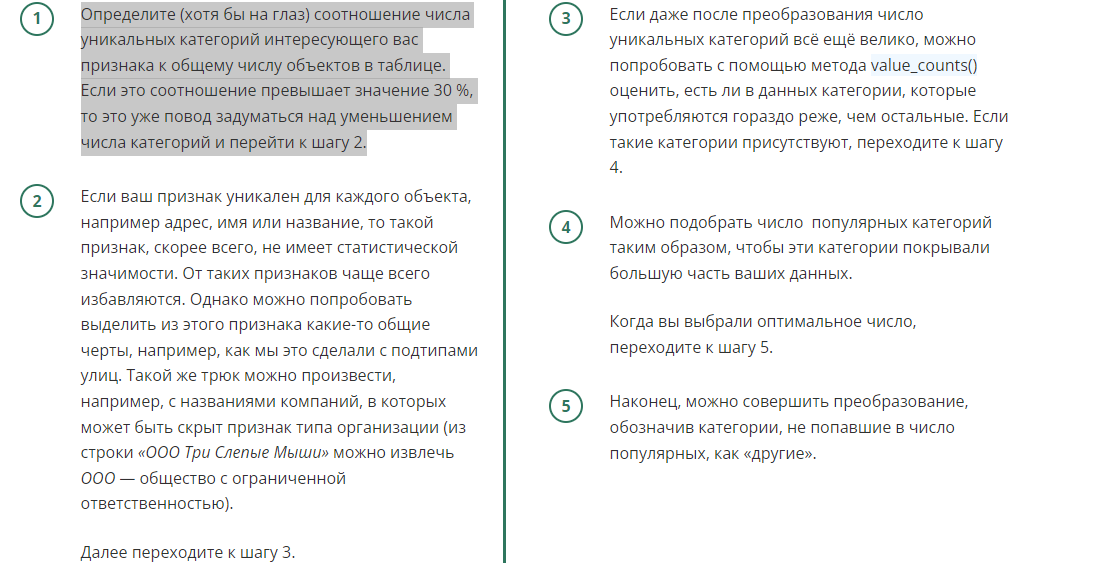

акая методика является очень популярной и хорошо показывает себя на практике. Однако не нужно ей злоупотреблять: применяя эту методику ко всем столбцам подряд, вы рискуете потерять немалую долю полезной информации из ваших данных. Внимательно изучите интересующий вас признак, прежде чем преобразовывать его.

Ранее, в задании 2.3, мы создали признак WeekdaySale в таблице melb_df — день недели продажи. Из полученных в задании результатов можно сделать вывод, что объекты недвижимости в Мельбурне продаются преимущественно по выходным (суббота и воскресенье).
Напишите функцию get_weekend(weekday), которая принимает на вход элемент столбца WeekdaySale и возвращает 1, если день является выходным, и 0 — в противном случае, и создайте столбец Weekend в таблице melb_df с помощью неё.

Примените эту функцию к столбцу и вычислите среднюю цену объекта недвижимости, проданного в выходные дни. Результат округлите до целых.

In [58]:
melb_df["Weekdaysale"]

0        5
1        3
2        5
3        5
4        5
        ..
13575    5
13576    5
13577    5
13578    5
13579    5
Name: Weekdaysale, Length: 13580, dtype: int64

In [59]:
def get_weekend(x):
    if (x==6) | (x==5):
        return 1
    else:
        return 0
melb_df["Weekend1"]=melb_df["Weekdaysale"].apply(get_weekend)

In [60]:
type(melb_df["Weekdaysale"])

pandas.core.series.Series

In [61]:
def get_weekend(row):
    if (row["Weekdaysale"]==6) | (row["Weekdaysale"]==5):
        return 1
    else:
        return 0
melb_df.apply(get_weekend,axis=1)

0        1
1        0
2        1
3        1
4        1
        ..
13575    1
13576    1
13577    1
13578    1
13579    1
Length: 13580, dtype: int64

In [62]:
melb_df.head(3)

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,Weekdaysale,StreetType,Weekend1
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,...,144.9984,Northern Metropolitan,4019,25.20,-0.231707,12,46,5,St,1
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,...,144.9934,Northern Metropolitan,4019,15.80,-0.327660,2,116,3,St,0
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,...,144.9944,Northern Metropolitan,4019,18.75,0.056338,3,117,5,St,1


In [63]:
round(melb_df[melb_df["Weekend1"]==1]['Price'].mean())

1081199

Преобразуйте столбец SellerG с наименованиями риелторских компаний в таблице melb_df следующим образом: оставьте в столбце только 49 самых популярных компаний, а остальные обозначьте как 'other'.
Найдите, во сколько раз минимальная цена объектов недвижимости, проданных компанией 'Nelson', больше минимальной цены объектов, проданных компаниями, обозначенными как 'other'. Ответ округлите до десятых.

In [64]:
popular =melb_df.SellerG.value_counts().nlargest(49).index

In [65]:
melb_df['SellerG'] = melb_df['SellerG'] .apply(lambda x: x if x in popular else 'other')

In [66]:
melb_df['SellerG'].value_counts()

Nelson           1565
Jellis           1316
other            1199
hockingstuart    1167
Barry            1011
Ray               701
Marshall          659
Buxton            632
Biggin            393
Brad              342
Woodards          301
Fletchers         301
Jas               243
Greg              239
McGrath           222
Sweeney           216
Noel              205
Miles             196
RT                184
Gary              170
Harcourts         168
Hodges            157
YPA               154
Stockdale         150
Village           125
Kay               119
Raine             116
Williams          111
Love              109
Douglas            97
Chisholm           77
RW                 70
Rendina            66
HAR                62
O'Brien            61
C21                57
Collins            56
Cayzer             52
Eview              51
Purplebricks       51
Philip             48
Buckingham         46
Bells              44
Thomson            42
Nick               40
Alexkarbon

In [67]:
price1=melb_df[melb_df['SellerG']=='Nelson']['Price'].min()
price2=melb_df[melb_df['SellerG']=='other']['Price'].min()

In [68]:
round(price1/price2,1)

1.3

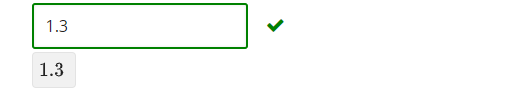

Представьте, что вы занимаетесь подготовкой данных о вакансиях с платформы hh.ru. В вашем распоряжении имеется таблица, в которой с помощью парсинга собраны резюме кандидатов. В этой таблице есть текстовый столбец «Опыт работы». Пример такого столбца представлен ниже в виде объекта Series. Структура текста в столбце фиксирована и не может измениться.

Напишите функцию get_experience(arg), аргументом которой является строка столбца с опытом работы. Функция должна возвращать опыт работы в месяцах. Не забудьте привести результат к целому числу.

Обратите внимание, что опыт работы может выражаться только в годах или только в месяцах. Учтите это при построении своей функции. Кроме того, учтите возможные вариации слов месяц (месяца, месяцев) и год (года, лет).

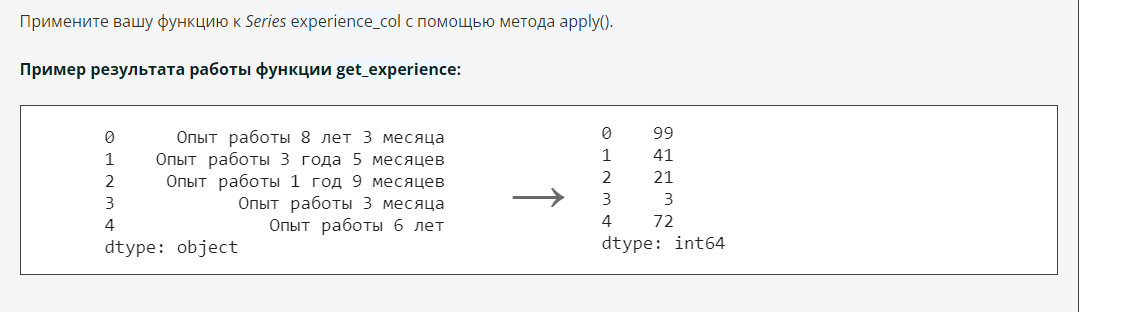

In [69]:
experience_col = pd.Series([
        'Опыт работы 8 лет 3 месяца',
        'Опыт работы 3 года 5 месяцев',
        'Опыт работы 1 год 9 месяцев',
        'Опыт работы 3 месяца',
        'Опыт работы 6 лет'
        ])
experience_col

0      Опыт работы 8 лет 3 месяца
1    Опыт работы 3 года 5 месяцев
2     Опыт работы 1 год 9 месяцев
3            Опыт работы 3 месяца
4               Опыт работы 6 лет
dtype: object

In [70]:
m="Опыт работы 8 лет 3 месяца"
list1 = ['месяца', 'месяц', 'месяцев']
list2 = ['лет','года','год']
address= m.split(' ')
type1 = address[-1]
print(address)
print(type1)
if type1 in list1:
    result=int(address[-2])+int(address[-4])*12
result
    

['Опыт', 'работы', '8', 'лет', '3', 'месяца']
месяца


99

In [71]:
def get_experience(arg):
    """
    Напишите функцию get_experience(arg), аргументом которой является строка столбца с опытом работы. 
    Функция должна возвращать опыт работы в месяцах. Не забудьте привести результат к целому числу.
    """
    list1 = ['месяца', 'месяц', 'месяцев']
    list2 = ['лет','года','год']
    
    arg1= arg.split(' ')
    print(arg1)
    type1 = arg1[-1]
    print(type1)
    l=len(arg1)
    if l > 4:
        if type1 in list1:
            result=int(arg1[-2])+int(arg1[-4])*12
            print(result)
            return result
    if l <= 4:
        if type1 in list2:
            result=int(arg1[-2])*12
            print(result)
            return result
        else:
            result=int(arg1[-2])
            print(result)
            return result

if __name__ == '__main__':
    experience_col = pd.Series([
        'Опыт работы 8 лет 3 месяца',
        'Опыт работы 3 года 5 месяцев',
        'Опыт работы 1 год 9 месяцев',
        'Опыт работы 3 месяца',
        'Опыт работы 6 лет'
        ])
    experience_month = experience_col.apply(get_experience)
    print(experience_month)

['Опыт', 'работы', '8', 'лет', '3', 'месяца']
месяца
99
['Опыт', 'работы', '3', 'года', '5', 'месяцев']
месяцев
41
['Опыт', 'работы', '1', 'год', '9', 'месяцев']
месяцев
21
['Опыт', 'работы', '3', 'месяца']
месяца
3
['Опыт', 'работы', '6', 'лет']
лет
72
0    99
1    41
2    21
3     3
4    72
dtype: int64


Тип данных Category

 Важной частью предобработки данных является оптимизация хранения данных и работы с ними. В этом разделе мы поговорим об оптимизации работы с категориальными признаками.

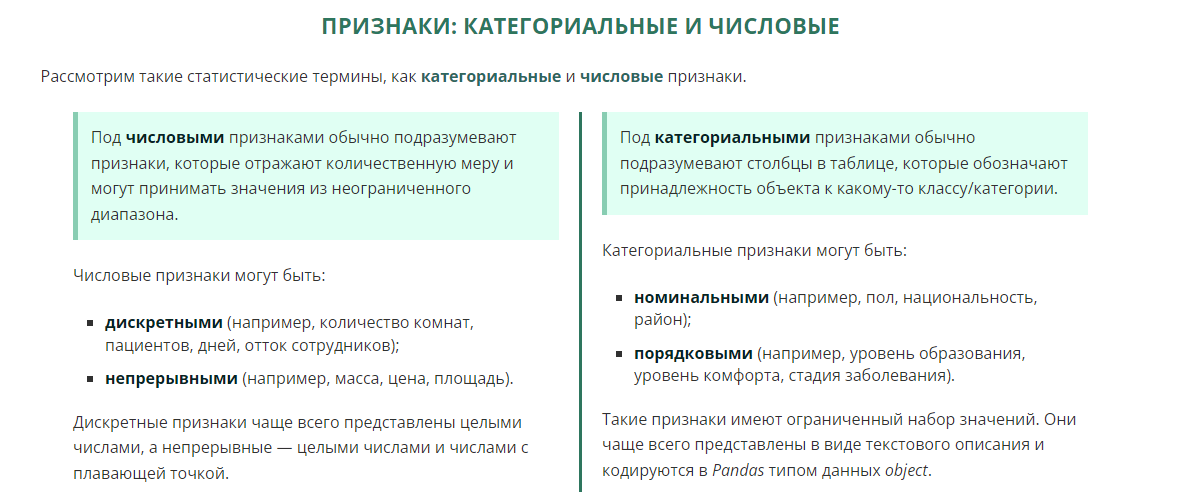

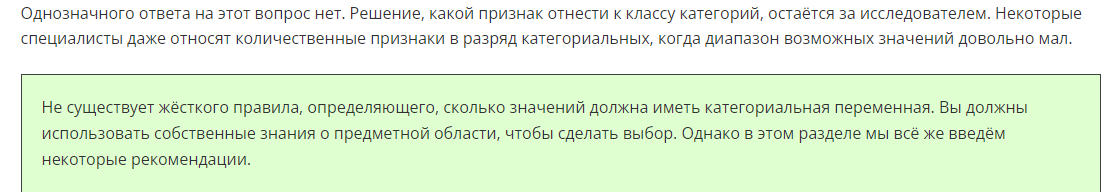

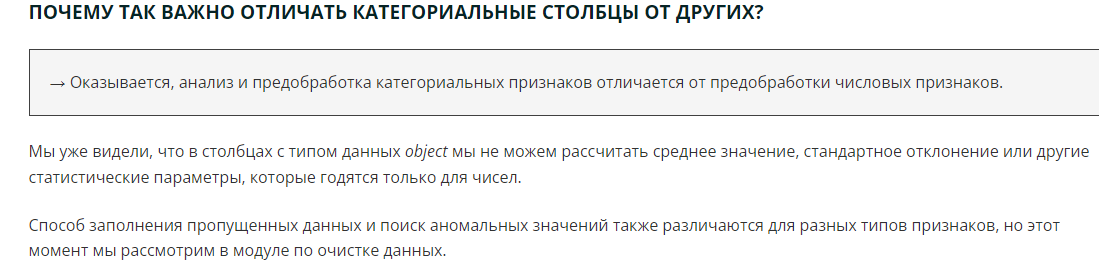

##КАТЕГОРИИ В ДАННЫХ О НЕДВИЖИМОСТИ

In [72]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in melb_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, melb_df[col].nunique(),melb_df[col].dtypes) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Weekend1,2,int64
1,Type,3,object
2,Method,5,object
3,Weekdaysale,5,int64
4,Regionname,8,object
5,Bathroom,9,int64
6,Rooms,9,int64
7,Car,11,int64
8,StreetType,11,object
9,Bedroom,12,int64



Создаём пустой список, в который будем добавлять кортежи: имя столбца, количество уникальных значений в нём и тип столбца.

В цикле перебираем имена столбцов, которые получаем с помощью атрибута columns. В переменной col на каждой итерации находятся имена столбцов — обращаемся к ним в цикле и извлекаем число уникальных элементов с помощью метода nunique(), а также тип столбца с помощью атрибута dtypes. Результат заносим в кортеж и добавляем его в список.

Из списка с кортежами (имя столбца, количество уникальных значений в нём, тип столбца) создаём DataFrame, даём названия его столбцам: Column_Name, Num_unique и Type.

Сортируем таблицу по столбцу Num_unique в порядке возрастания количества уникальных элементов с помощью метода sort_values() и выводим результат на экран.

Примечание. Мы ещё не изучали сортировку DataFrame методом sort_values() — данную тему мы обсудим в следующем модуле, однако здесь эта функция необходима для более наглядной интерпретации результата.

Итак, с помощью такого несложного кода мы смогли получить вспомогательную таблицу, где в отсортированном виде показано количество уникальных значений во всех столбцах и их типы.

?
Что интересного мы можем узнать из такой таблицы?

Если присмотреться внимательно, можно увидеть резкий скачок количества уникальных значений, начиная с 14 строки таблицы, где число уникальных значений составляет 152. Учтём этот момент.

Условимся, что категориальными будем считать признаки, у которых число уникальных категорий меньше 150.

Однако учтём, что признак Date (дата продажи), преобразованный нами ранее в формат datetime, является временным признаком, поэтому далее не будем его воспринимать как категориальный. 

К тому же в наш потенциальный список попали количественные столбцы Rooms, Car, Bedroom и Bathroom. Договоримся, что мы не будем относить их к разряду категориальных, однако, как упоминалось ранее, такое тоже вполне возможно.

Примечание. Ещё раз подчеркиваем, что такая классификация признаков является исключительно субъективной и специфична для задачи.

Для хранения и оптимизации работы с категориальными признаками в Pandas предусмотрен специальный тип данных — category.

Этот тип данных является гибридным: внешне он выглядит как строка, но внутренне представлен массивом целых чисел. Так как данные вместо изначальных строк хранятся в памяти как число, то объём памяти, занимаемой таблицей при использовании типа category, резко уменьшается, что повышает эффективность хранения и работы с таблицей.

→ Более того, этот тип данных расширяет возможности работы с категориальными признаками: мы можем легко преобразовывать категории, строить графики по таким данным (что сложно сделать для типа данных object). Также резко повышается производительность операций, совершаемых с такими столбцами.

Самый простой способ преобразования столбцов к типу данных category — это использование уже знакомого нам метода astype, в параметры которого достаточно передать строку 'category'.

In [73]:
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  object        
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  object        
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  objec

None

In [74]:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

адаём список столбцов, которые мы не берём в рассмотрение (cols_to_exclude), а также условленный нами ранее порог уникальных значений столбца max_unique_count.

2
В цикле перебираем имена столбцов, и, если число уникальных категорий меньше заданного порога и имён столбцов нет в списке cols_to_exclude, то с помощью метода astype() приводим столбец к типу данных category.

3
Итоговый объём памяти — 1.9 Мб. В результате такого преобразования объём памяти, занимаемый таблицей, уменьшился почти в 1.5 раза. Это впечатляет!

У типа данных category есть свой специальный аксесcор cat, который позволяет получать информацию о своих значениях и преобразовывать их. Например, с помощью атрибута этого аксессора categories мы можем получить список уникальных категорий в столбце Regionname:

А теперь посмотрим, каким образом столбец кодируется в виде чисел в памяти компьютера. Для этого можно воспользоваться атрибутом codes:

In [75]:
print(melb_df['Regionname'].cat.categories)

Index(['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria'],
      dtype='object')


In [76]:
display(melb_df['Regionname'].cat.codes)

0        2
1        2
2        2
3        2
4        2
        ..
13575    4
13576    6
13577    6
13578    6
13579    6
Length: 13580, dtype: int8

In [77]:
melb_df['Regionname']

0             Northern Metropolitan
1             Northern Metropolitan
2             Northern Metropolitan
3             Northern Metropolitan
4             Northern Metropolitan
                    ...            
13575    South-Eastern Metropolitan
13576          Western Metropolitan
13577          Western Metropolitan
13578          Western Metropolitan
13579          Western Metropolitan
Name: Regionname, Length: 13580, dtype: category
Categories (8, object): ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']

С помощью метода аксессора rename_categories() можно легко переименовать текущие значения категорий. Для этого в данный метод нужно передать словарь, ключи которого — старые имена категорий, а значения — новые.

Рассмотрим на примере: переименуем категории признака типа постройки Type — заменим их на полные названия (напомним, u — unit, h — house, t — townhouse).

In [78]:
melb_df['Type'] = melb_df['Type'].cat.rename_categories({
    'u': 'unit',
    't': 'townhouse',
    'h': 'house'
})
display(melb_df['Type'])

0        house
1        house
2        house
3        house
4        house
         ...  
13575    house
13576    house
13577    house
13578    house
13579    house
Name: Type, Length: 13580, dtype: category
Categories (3, object): ['house', 'townhouse', 'unit']

А теперь представим ситуацию, что появилась новая партия домов и теперь мы продаём и квартиры (flat). Создадим объект Series new_houses_types, в котором будем хранить типы зданий новой партии домов. Преобразуем тип new_houses_types в такой же тип, как и у столбца Type в таблице melb_data, и выведем результат на экран:

In [79]:
new_houses_types = pd.Series(['unit', 'house', 'flat', 'flat', 'house'])
new_houses_types = new_houses_types.astype(melb_df['Type'].dtype)
display(new_houses_types)


0     unit
1    house
2      NaN
3      NaN
4    house
dtype: category
Categories (3, object): ['house', 'townhouse', 'unit']

Хммм... С нашими новыми объектами недвижимости произошло нечто странное. По какой-то причине вместо квартир мы получили пустые значения — NaN.

На самом деле причина проста: тип данных category хранит только категории, которые были объявлены при его инициализации. При встрече с новой, неизвестной ранее категорией, этот тип превратит её в пустое значение, так как он просто не знает о существовании этой категории.

Решить эту проблему на самом деле не сложно. Можно добавить категорию flat в столбец Type с помощью метода акссесора cat add_categories(), в который достаточно просто передать имя новой категории:

In [80]:
melb_df['Type'] = melb_df['Type'].cat.add_categories('flat')
new_houses_types = pd.Series(['unit', 'house', 'flat', 'flat', 'house'])
new_houses_types = new_houses_types.astype(melb_df['Type'].dtype)
display(new_houses_types)

0     unit
1    house
2     flat
3     flat
4    house
dtype: category
Categories (4, object): ['house', 'townhouse', 'unit', 'flat']

Примечание. Добавление новой категории в столбец Type не отразится на самом столбце — текущие категории не изменятся, однако такое преобразование позволит добавлять в таблицу новые данные о домах с новой категорией — flat.

Из данного примера можно сделать вывод, что если набор категорий в столбце жёстко не зафиксирован и может обновляться в процессе работы, то тип category не является подходящим типом данных для этого столбца или необходимо постоянно писать проверки при обновлении таблицы.

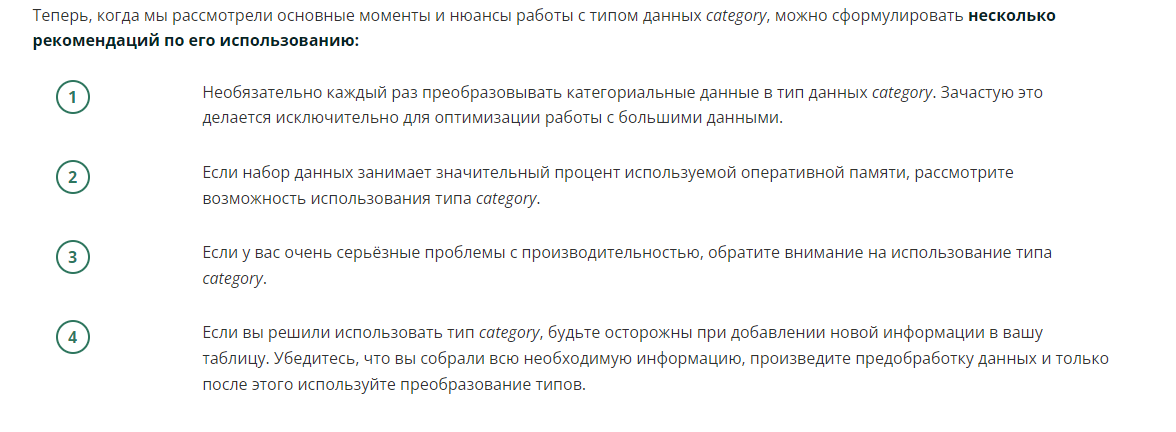

При преобразовании столбцов таблицы о недвижимости к типу category мы оставили без внимания столбец Suburb (пригород). Давайте исправим это.
С помощью метода info() узнайте, сколько памяти занимает таблица melb_df.
Преобразуйте признак Suburb следующим образом: оставьте в столбце только 119 наиболее популярных пригородов, остальные замените на 'other'.
Приведите данные в столбце Suburb к категориальному типу.
В качестве ответа запишите разницу между объёмом занимаемой памяти до преобразования (который мы получили ранее в модуле) и после него в Мб. Ответ округлите до десятых.

In [81]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

In [82]:
k=melb_df["Suburb"].value_counts().nlargest(119).index
k

Index(['Reservoir', 'Richmond', 'Bentleigh East', 'Preston', 'Brunswick',
       'Essendon', 'South Yarra', 'Glen Iris', 'Hawthorn', 'Coburg',
       ...
       'Albion', 'Hoppers Crossing', 'Sunbury', 'Greensborough', 'Bundoora',
       'Hughesdale', 'Chadstone', 'Caulfield North', 'Mont Albert',
       'Alphington'],
      dtype='object', length=119)

In [83]:
melb_df["Suburb"]=melb_df["Suburb"].apply(lambda x: x if x in k else 'other' )

In [84]:
melb_df["Suburb"]=melb_df["Suburb"].astype('category')

In [85]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  category      
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

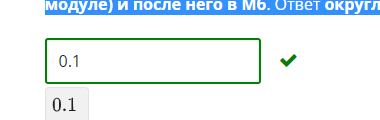

https://hightech.fm/2018/08/09/featureengineering

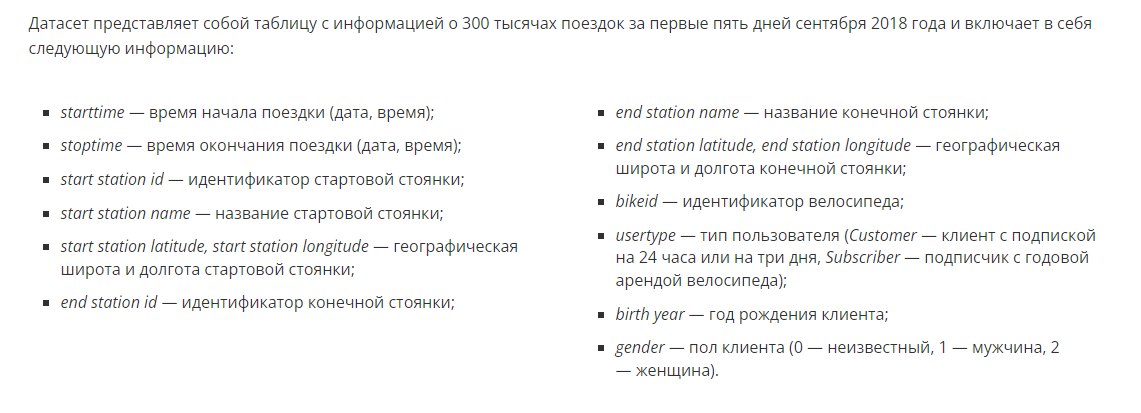

In [86]:
pwd

'C:\\Users\\User\\Desktop\\ML urfu 2022'

In [87]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\ML urfu 2022\\citibike-tripdata.csv",sep=',')
df.head()

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1
1,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0
2,2018-09-01 00:00:20.6490,2018-09-01 00:55:58.5470,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1
3,2018-09-01 00:00:21.7460,2018-09-01 00:07:38.5830,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2
4,2018-09-01 00:00:27.3150,2018-09-01 02:21:25.3080,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   starttime                300000 non-null  object 
 1   stoptime                 300000 non-null  object 
 2   start station id         299831 non-null  float64
 3   start station name       299831 non-null  object 
 4   start station latitude   300000 non-null  float64
 5   start station longitude  300000 non-null  float64
 6   end station id           299831 non-null  float64
 7   end station name         299831 non-null  object 
 8   end station latitude     300000 non-null  float64
 9   end station longitude    300000 non-null  float64
 10  bikeid                   300000 non-null  int64  
 11  usertype                 300000 non-null  object 
 12  birth year               300000 non-null  int64  
 13  gender                   300000 non-null  int64  
dtypes: f

Сколько пропусков в столбце start station id?

In [89]:
df["start station id"].isna().sum()

169

Найдите идентификатор самой популярной стартовой стоянки. Запишите идентификатор в виде целого числа.

In [90]:
df["start station id"].mode()

0    281.0
Name: start station id, dtype: float64

In [91]:
df["start station id"].value_counts().nlargest(3)

281.0     1928
2006.0    1909
519.0     1873
Name: start station id, dtype: int64

In [92]:
df["start station id"].value_counts().nlargest(3).index[0]

281.0

Велосипед с каким идентификатором является самым популярным?

In [93]:
df["bikeid"].value_counts().nlargest(3)

33887    107
34358    104
34159    103
Name: bikeid, dtype: int64

In [94]:
df["bikeid"].value_counts().nlargest(3).index[0]

33887

In [95]:
df["bikeid"].mode()

0    33887
Name: bikeid, dtype: int64

Какой тип клиентов (столбец usertype) является преобладающим — Subscriber или Customer? В качестве ответа запишите долю клиентов преобладающего типа среди общего количества клиентов. Ответ округлите до сотых

In [96]:
df.usertype.value_counts(normalize=True)

Subscriber    0.774007
Customer      0.225993
Name: usertype, dtype: float64

In [97]:
df.usertype.mode()

0    Subscriber
Name: usertype, dtype: object

Кто больше занимается велоспортом — мужчины или женщины? В ответ запишите число поездок для той группы, у которой их больше.

Для решения данной задачи достаточно произвести фильтрацию по условию равенства столбца gender значениям 1 и 2, и найти число строк в отфильтрованных таблицах. После этого необходимо выбрать максимальное из двух чисел.

In [98]:
df.gender.unique()

array([1, 0, 2], dtype=int64)

In [99]:
df[df.gender==1].shape[0] 


183582

In [100]:
df[df.gender==2].shape[0] 


74506

In [101]:
df.describe()

,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,299831.000000,300000.000000,300000.000000,299831.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1695.665665,40.737769,-73.982042,1684.624298,40.737294,-73.982330,26688.525943,1979.364803,1.108647
std,1458.264055,0.031999,0.020207,1457.549589,0.031794,0.020261,6271.691143,11.920796,0.613398
min,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.083639,14529.000000,1885.000000,0.000000
25%,387.000000,40.716226,-73.995991,387.000000,40.716059,-73.996621,20569.000000,1969.000000,1.000000
50%,519.000000,40.737262,-73.985162,519.000000,40.737050,-73.985649,28197.000000,1982.000000,1.000000
75%,3282.000000,40.760683,-73.970416,3282.000000,40.760094,-73.971092,32216.000000,1989.000000,1.000000
max,3705.000000,40.869000,-73.878000,3705.000000,40.869000,-73.878000,34863.000000,2002.000000,2.000000


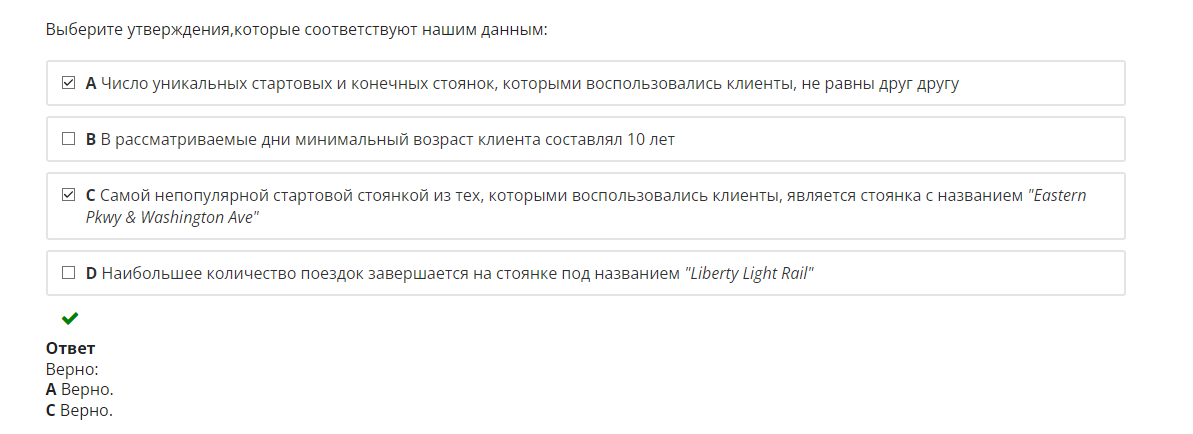

In [102]:
df.describe(include=[object])  

,starttime,stoptime,start station name,end station name,usertype
count,300000,300000,299831,299831,300000
unique,299836,299813,759,765,2
top,2018-09-02 13:59:41.7770,2018-09-04 17:51:07.9110,Grand Army Plaza & Central Park S,West St & Chambers St,Subscriber
freq,2,2,1928,1963,232202


In [103]:
df[df["usertype"]=='Customer']['start station name'].value_counts().nlargest(2)

Central Park S & 6 Ave               1332
Grand Army Plaza & Central Park S    1234
Name: start station name, dtype: int64

In [104]:
df[df["usertype"]=='Subscriber']['start station name'].value_counts().nlargest(2)

Pershing Square North    1615
E 17 St & Broadway       1509
Name: start station name, dtype: int64

Замените признак birth year на более понятный признак возраста клиента age. Годом отсчёта возраста выберите 2018 год. Столбец birth year удалите из таблицы. Сколько поездок совершено клиентами старше 60 лет?

In [105]:
df['age']=2018-df["birth year"]

In [106]:
df[df['age']>60].shape[0]

11837

Создайте признак длительности поездки trip duration. Для этого вычислите интервал времени между временем окончания поездки (stoptime) и её началом (starttime). Сколько целых минут длилась поездка под индексом 3 в таблице?

In [107]:
df['stoptime'] = pd.to_datetime(df['stoptime'])
df['starttime'] = pd.to_datetime(df['starttime'])

In [108]:
df['trip duration']=df['stoptime']-df['starttime']

In [109]:
df['trip duration'].iloc[3]

Timedelta('0 days 00:07:16.837000')

In [114]:
df['trip duration']

0        0 days 00:27:15.365000
1        0 days 00:02:12.200000
2        0 days 00:55:37.898000
3        0 days 00:07:16.837000
4        0 days 02:20:57.993000
                  ...          
299995   0 days 00:07:23.648000
299996   0 days 00:11:33.138000
299997   0 days 00:05:12.997000
299998   0 days 00:56:00.092000
299999   0 days 00:03:45.051000
Name: trip duration, Length: 300000, dtype: timedelta64[ns]

In [126]:
df['trip duration']/np.timedelta64(1, 'm')

0          27.256083
1           2.203333
2          55.631633
3           7.280617
4         140.966550
             ...    
299995      7.394133
299996     11.552300
299997      5.216617
299998     56.001533
299999      3.750850
Name: trip duration, Length: 300000, dtype: float64

https://www.plus2net.com/python/pandas-dt-timedelta64.php

In [111]:
s = pd.Series(pd.date_range("2012-1-1", periods=3, freq="D"))
td = pd.Series([pd.Timedelta(days=i) for i in range(3)])
df1 = pd.DataFrame({"A": s, "B": td})
df1

,A,B
0,2012-01-01,0 days
1,2012-01-02,1 days
2,2012-01-03,2 days


In [112]:
df1["C"] = df1["A"] + df1["B"]

In [113]:
df1

,A,B,C
0,2012-01-01,0 days,2012-01-01
1,2012-01-02,1 days,2012-01-03
2,2012-01-03,2 days,2012-01-05


In [115]:
import pandas as pd 
my_dict={'NAME':['Ravi','Raju','Alex'],
         'dt_start':['1/1/2020','2/1/2020','5/1/2020'],
         'dt_end':['6/15/2022','7/22/2022','11/15/2023']
}
my_data = pd.DataFrame(data=my_dict)
my_data['dt_start'] = pd.to_datetime(my_data['dt_start'])
my_data['dt_end'] = pd.to_datetime(my_data['dt_end'])
print(my_data)

   NAME   dt_start     dt_end
0  Ravi 2020-01-01 2022-06-15
1  Raju 2020-02-01 2022-07-22
2  Alex 2020-05-01 2023-11-15


In [116]:
my_data['diff_days']=my_data['dt_end']-my_data['dt_start']
print(my_data)

   NAME   dt_start     dt_end diff_days
0  Ravi 2020-01-01 2022-06-15  896 days
1  Raju 2020-02-01 2022-07-22  902 days
2  Alex 2020-05-01 2023-11-15 1293 days


In [117]:
my_data['diff_days'].dt.days

0     896
1     902
2    1293
Name: diff_days, dtype: int64

Создайте «признак-мигалку» weekend, который равен 1, если поездка начиналась в выходной день (суббота или воскресенье), и 0 — в противном случае. Выясните, сколько поездок начиналось в выходные.

Подсказка (1 из 3): Чтобы создать признак weekend, необходимо с помощью атрибута аксессора dt dayofweek выделить день недели из столбца с датой начала поездки.
Подсказка (2 из 3): С помощью метода apply() можно применить к результирующей Series функцию, которая принимает на вход число (день поездки) и возвращает 1, если это число равно 5 или 6 (суббота и воскресенье), в противном случае функция возвращает 0. Результат необходимо занести в столбец weekend.
Подсказка (3 из 3): Самый простой способ посчитать число поездок, совершаемых в выходные — рассчитать сумму по столбцу (поскольку столбец состоит из 1 и 0, на выходе суммы получается количество, равное 1).

In [127]:
df['weekend']=df['starttime'].dt.dayofweek

In [128]:
df['weekend']=df["weekend"].apply(lambda x:1 if (x==6) |(x==5) else 0)

In [129]:
df[df['weekend']==1].shape[0]

115135

In [130]:
df['weekend'].value_counts()

0    184865
1    115135
Name: weekend, dtype: int64

оздайте признак времени суток поездки time_of_day. Время суток будем определять из часа начала поездки. Условимся, что:
поездка совершается ночью (night), если её час приходится на интервал от 0 (включительно) до 6 (включительно) часов;
поездка совершается утром (morning), если её час приходится на интервал от 6 (не включительно) до 12 (включительно) часов;
поездка совершается днём (day), если её час приходится на интервал от 12 (не включительно) до 18 (включительно) часов;
поездка совершается вечером (evening), если её час приходится на интервал от 18 (не включительно) до 23 часов (включительно).
Во сколько раз количество поездок, совершённых днём, больше, чем количество поездок, совёршенных ночью, за представленный в данных период времени? Ответ округлите до целых.

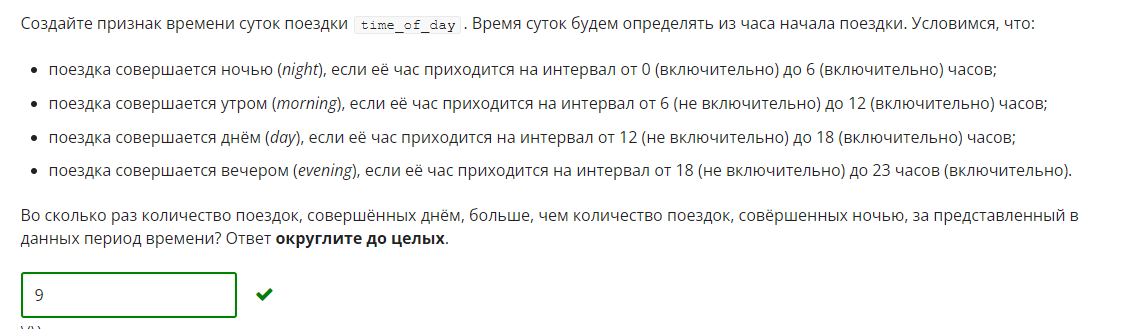

In [135]:
def get_time_of_day(x):
    if x in range(0,7):
        return 0
    if x in range(7,13):
        return 1
    if x in range(13,19):
        return 2
    if x in range(19,24):
        return 3


Подсказка (1 из 3): Определите функцию get_time_of_day, которая принимает на вход время (в часах) и возвращает время суток в зависимости от принадлежности часа к указанному в задании диапазону.
Подсказка (2 из 3): Примените эту функцию к столбцу starttime, предварительно выделив час начала поездки с помощью атрибута аксессора dt hour. Результат занесите в столбец time_of_day.
Подсказка (3 из 3): С помощью фильтрации найдите число поездок, совершённых днем и ночью, и разделите первое на второе.

In [136]:
df['time_of_day']=df['starttime'].dt.hour
df.time_of_day.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [138]:
df.time_of_day=df.time_of_day.apply(get_time_of_day)

In [141]:
df.time_of_day[df.time_of_day==2].value_counts()[2]

143012

In [143]:
df.time_of_day[df.time_of_day==2].value_counts()[2]/df.time_of_day[df.time_of_day==0].shape[0]

9.480411004308916